# Your Title Here

**Name(s)**: Johnny Gonzales, Pratheek Sankeshi

**Website Link**: https://psankesh9.github.io/recipeAnalysis/

## Code

In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats
import plotly.express as px
pd.options.plotting.backend = 'plotly' 

### Cleaning and EDA

In [2]:
import pandas as pd
import numpy as np

# Load the datasets
interactions = pd.read_csv("RAW_interactions.csv")
recipes = pd.read_csv("RAW_recipes.csv")

# Merge the DataFrames
merged_df = pd.merge(recipes, interactions, left_on='id', right_on='recipe_id', how='left')

# Remove duplicates
merged_df = merged_df.drop_duplicates()

# Convert date columns to datetime format
merged_df['submitted'] = pd.to_datetime(merged_df['submitted'])
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Convert 'id' to string, drop 'recipe_id' since it's redundant after the merge
merged_df['id'] = merged_df['id'].astype(str)
merged_df.drop('recipe_id', axis=1, inplace=True)

# Replace 0 Ratings with NaN
merged_df['rating'].replace(0, np.nan, inplace=True)

# Calculate Average Rating per Recipe
average_ratings = merged_df.groupby('id')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)

# Drop the existing 'average_rating' column in merged_df to avoid duplicates
if 'average_rating' in merged_df.columns:
    merged_df.drop('average_rating', axis=1, inplace=True)

# Merge the Average Ratings into merged_df
merged_df = pd.merge(merged_df, average_ratings, on='id', how='left')


In [3]:
# Replace 'merged_df' with the name of your DataFrame
merged_df.to_csv('my_processed_data.csv', index=False)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.tools as tls

# Assuming merged_df is your DataFrame

# Function to convert seaborn plot to HTML
def save_plot_to_html(plot, file_name):
    fig = tls.mpl_to_plotly(plot.figure)
    fig.write_html(f'assets/{file_name}.html', include_plotlyjs='cdn')
    plt.close()

# Plotting the distribution of the number of steps in recipes
plt.figure(figsize=(12, 6))
plot = sns.histplot(merged_df['n_steps'], bins=30, kde=True)
plt.title('Distribution of Number of Steps in Recipes')
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
save_plot_to_html(plot, 'distribution_of_steps')

# Plotting the distribution of the number of ingredients in recipes
plt.figure(figsize=(12, 6))
plot = sns.histplot(merged_df['n_ingredients'], bins=30, kde=True)
plt.title('Distribution of Number of Ingredients in Recipes')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
save_plot_to_html(plot, 'distribution_of_ingredients')

# Plotting the distribution of average ratings
plt.figure(figsize=(12, 6))
plot = sns.histplot(merged_df['average_rating'].dropna(), bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
save_plot_to_html(plot, 'distribution_of_ratings')

# Relationship between Number of Steps and Average Rating
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(x='n_steps', y='average_rating', data=merged_df)
plt.title('Relationship Between Number of Steps and Average Rating')
plt.xlabel('Number of Steps')
plt.ylabel('Average Rating')
save_plot_to_html(plot, 'steps_vs_average_rating')

# Relationship between Number of Ingredients and Average Rating
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(x='n_ingredients', y='average_rating', data=merged_df)
plt.title('Relationship Between Number of Ingredients and Average Rating')
plt.xlabel('Number of Ingredients')
plt.ylabel('Average Rating')
save_plot_to_html(plot, 'ingredients_vs_average_rating')


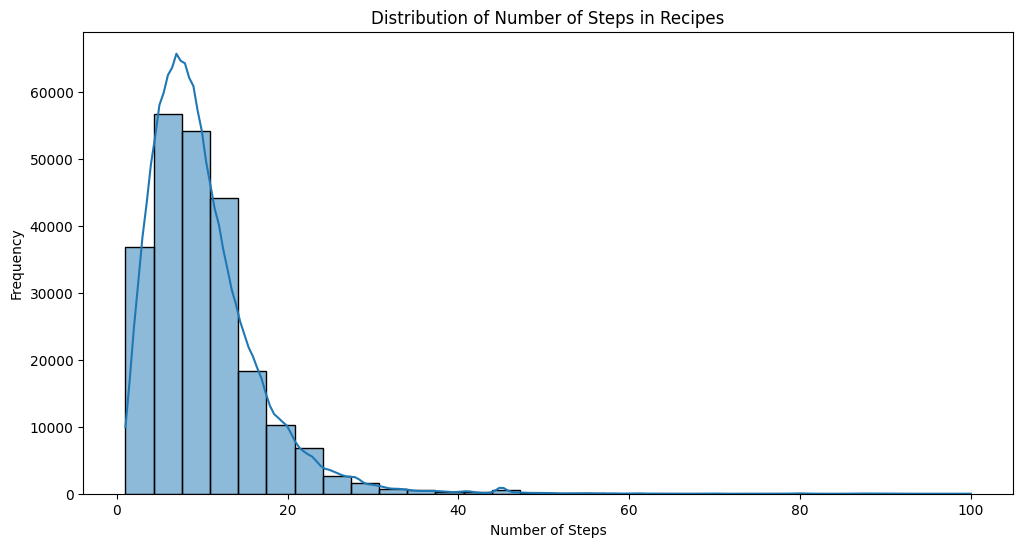

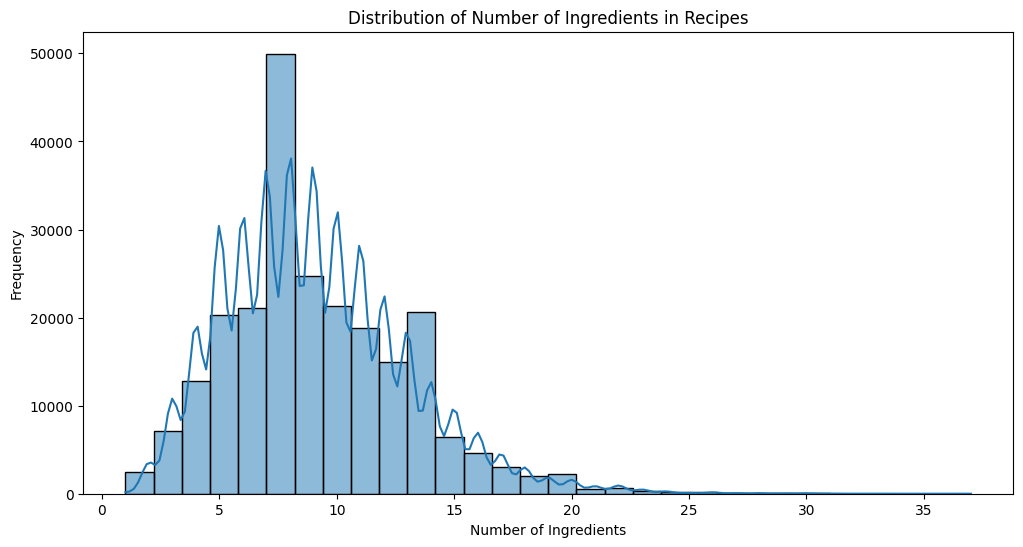

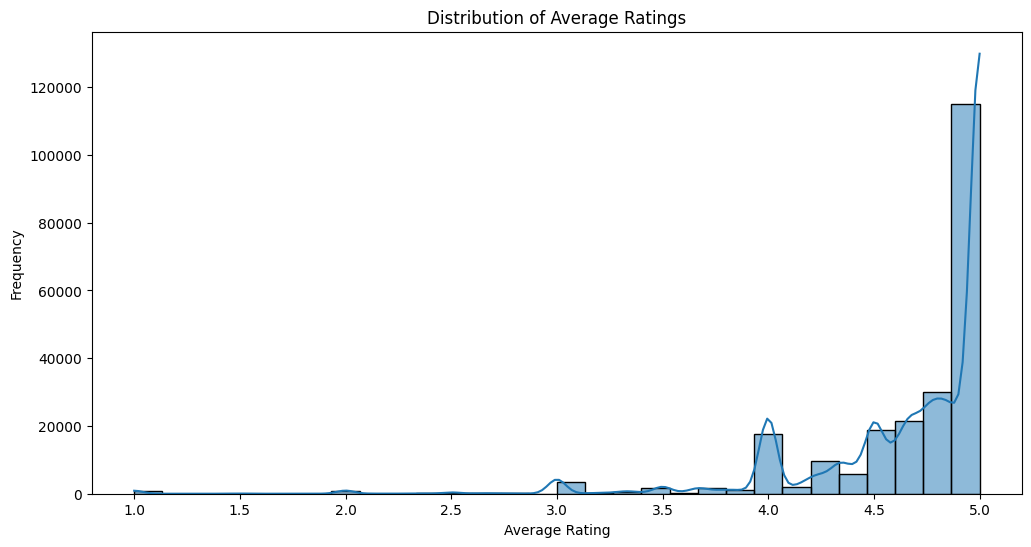

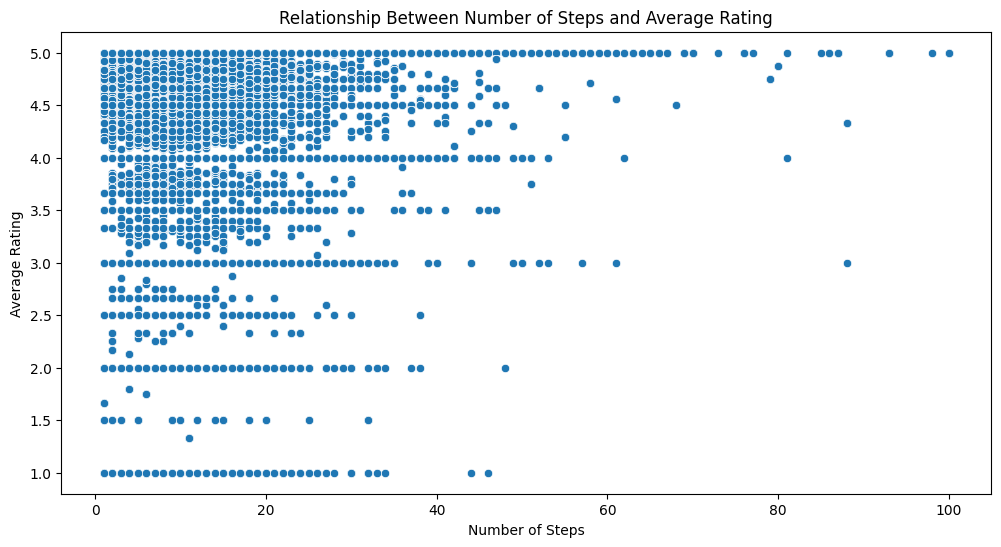

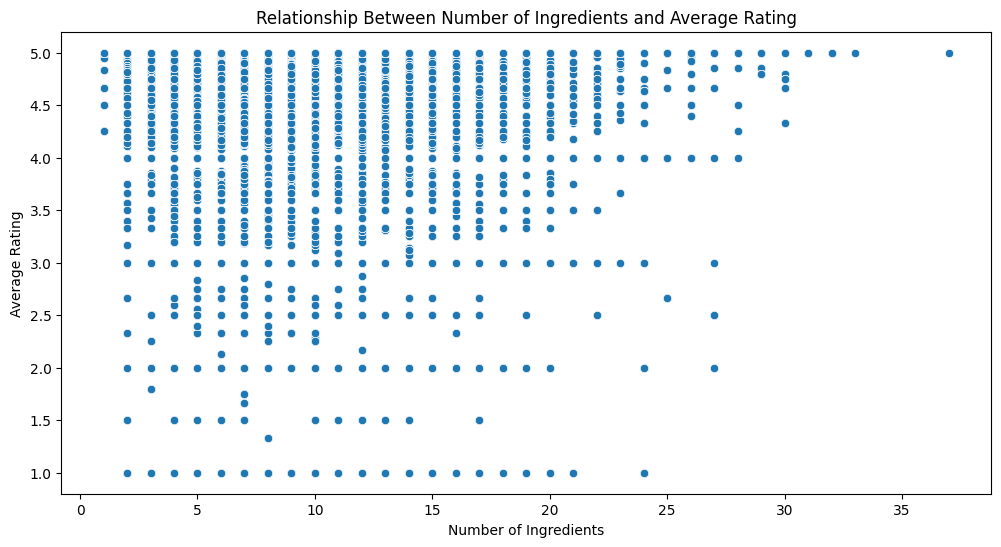

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Univariate Analysis: Plotting the distributions

# Plotting the distribution of the number of steps in recipes
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['n_steps'], bins=30, kde=True)
plt.title('Distribution of Number of Steps in Recipes')
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.show()
# This histogram shows the frequency of recipes based on the number of steps required to make them.

# Plotting the distribution of the number of ingredients in recipes
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['n_ingredients'], bins=30, kde=True)
plt.title('Distribution of Number of Ingredients in Recipes')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()
# This histogram illustrates how many ingredients are typically used in recipes, indicating their complexity.

# Plotting the distribution of average ratings
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['average_rating'].dropna(), bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()
# This plot reveals the distribution of average ratings given to recipes, useful for understanding general trends in recipe ratings.

# Bivariate Analysis: Relationship plots

# Relationship between Number of Steps and Average Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='n_steps', y='average_rating', data=merged_df)
plt.title('Relationship Between Number of Steps and Average Rating')
plt.xlabel('Number of Steps')
plt.ylabel('Average Rating')
plt.show()
# This scatter plot examines if there's a correlation between the number of steps in a recipe and its average rating.

# Relationship between Number of Ingredients and Average Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='n_ingredients', y='average_rating', data=merged_df)
plt.title('Relationship Between Number of Ingredients and Average Rating')
plt.xlabel('Number of Ingredients')
plt.ylabel('Average Rating')
plt.show()
# This scatter plot explores whether the number of ingredients in a recipe affects its average rating.


### Assessment of Missingness

In [6]:
def missingness_test(data, column_to_test, column_with_missingness):
    """
    Performs a permutation test to check if the missingness in one column 
    depends on values in another column.
    
    :param data: pandas DataFrame
    :param column_to_test: Column to test for dependency
    :param column_with_missingness: Column with missing values
    :return: p-value from the permutation test
    """
    # Create a mask for missing values
    missing = data[column_with_missingness].isnull()

    # Calculate the observed test statistic (mean difference)
    observed_statistic = data.loc[missing, column_to_test].mean() - data.loc[~missing, column_to_test].mean()

    # Permutation test
    n_reps = 1000
    perm_stats = np.zeros(n_reps)
    for i in range(n_reps):
        # Shuffle the missingness labels
        shuffled_missing = data[column_with_missingness].sample(frac=1, replace=False).isnull()
        perm_stats[i] = data.loc[shuffled_missing, column_to_test].mean() - data.loc[~shuffled_missing, column_to_test].mean()

    # Compute p-value
    p_value = np.mean(perm_stats >= observed_statistic)

    return p_value

# Example usage
p_value = missingness_test(merged_df, 'n_steps', 'rating')
print(f"P-value for dependency of missingness in 'rating' on 'n_steps': {p_value}")

P-value for dependency of missingness in 'rating' on 'n_steps': 1.0


### Hypothesis Testing

In [7]:
# Hypothesis Testing: Effect of number of ingredients on average rating

# Splitting the data into two groups based on a median split of 'n_ingredients'
median_ingredients = merged_df['n_ingredients'].median()
group1 = merged_df[merged_df['n_ingredients'] <= median_ingredients]['average_rating']
group2 = merged_df[merged_df['n_ingredients'] > median_ingredients]['average_rating']

# Performing a t-test
t_stat, p_value = stats.ttest_ind(group1.dropna(), group2.dropna())

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 1.042663633427837, P-value: 0.2971051945778797


In [8]:
"""
P-value for dependency of missingness in 'rating' on 'n_steps': 1.0
This p-value suggests that the missingness in the 'rating' column is not dependent on the 'n_steps' column. A p-value of 1.0 indicates that our observed statistic is completely within the range of what we'd expect under the null hypothesis (that missingness in 'rating' is independent of 'n_steps'). This means there is no evidence to suggest that the number of steps in a recipe influences whether its rating is missing.
Hypothesis Testing:
T-statistic: 1.042663633427837, P-value: 0.2971051945778797
The p-value obtained from the t-test is about 0.297, which is not lower than the common significance level (e.g., 0.05). Therefore, we fail to reject the null hypothesis. This result suggests that there is no significant difference in average ratings between recipes with fewer ingredients (less than or equal to the median) and those with more ingredients (greater than the median). In other words, the number of ingredients in a recipe does not seem to have a significant effect on its average rating.
Based on these findings, it appears that the complexity of a recipe, in terms of the number of steps or ingredients, does not significantly influence its likelihood of being rated or its average rating. This could indicate that other factors, possibly related to the content or quality of the recipe itself, might be more influential in determining these aspects.
""""""

SyntaxError: EOF while scanning triple-quoted string literal (3149383229.py, line 8)